In [1]:
from mesh4d import utils

landmarks = utils.load_pkl_object('output/transform/fast_transform.pkl')
landmarks.to_array()[0].shape

(5, 12, 3)

## Calculations...

> Zhang, L. Y., Yick, K. L., Yue, M. J., Yip, J., & Ng, S. P. (2023). An exploratory study of dynamic foot shape measurements with 4D scanning system. Scientific Reports, 13(1), 8628.

In [2]:
import numpy as np

metric = {}

metric['FL'] = ['foot length'] + list(np.abs(landmarks.markers['P1'].coord[1] - landmarks.markers['P10'].coord[1]))
metric['MBL'] = ['medial ball length'] + list(np.abs(landmarks.markers['P4'].coord[1] - landmarks.markers['P10'].coord[1]))
metric['LBL'] = ['lateral ball length'] + list(np.abs(landmarks.markers['P5'].coord[1] - landmarks.markers['P10'].coord[1]))
metric['ABW'] = ['anatomical ball width'] + list(np.sqrt(
    (landmarks.markers['P4'].coord[1] - landmarks.markers['P3'].coord[1])**2
    + (landmarks.markers['P4'].coord[0] - landmarks.markers['P3'].coord[0])**2
    ))
metric['OBW'] = ['orthogonal ball width'] + list(np.abs(landmarks.markers['P4'].coord[0] - landmarks.markers['P3'].coord[0]))
metric['OHW'] = ['orthogonal heel width'] + list(np.abs(landmarks.markers['P9'].coord[0] - landmarks.markers['P8'].coord[0]))
metric['BH'] = ['ball heigh'] + list(np.abs(landmarks.markers['P6'].coord[2]))
metric['IH'] = ['instep height'] + list(np.abs(landmarks.markers['P7'].coord[2]))

## Table

In [3]:
import pandas as pd

df = pd.DataFrame(metric, index=['description'] + [f'frame{idx}' for idx in range(len(landmarks.to_array()[0]))])
df

,FL,MBL,LBL,ABW,OBW,OHW,BH,IH
description,foot length,medial ball length,lateral ball length,anatomical ball width,orthogonal ball width,orthogonal heel width,ball heigh,instep height
frame0,206.828484,177.049015,117.650856,31.859235,13.032218,14.20338,67.823856,77.452649
frame1,216.188804,177.577767,137.742277,19.714708,11.443213,12.866941,32.605442,34.116409
frame2,217.931521,173.794353,133.890667,18.321913,13.222202,17.194629,29.140415,31.393023
frame3,215.48088,167.711107,132.921727,21.747653,20.836195,16.852156,21.418944,28.696312
frame4,185.108207,130.136817,105.16714,21.791462,19.133583,21.282556,6.151678,10.659648


<Axes: >

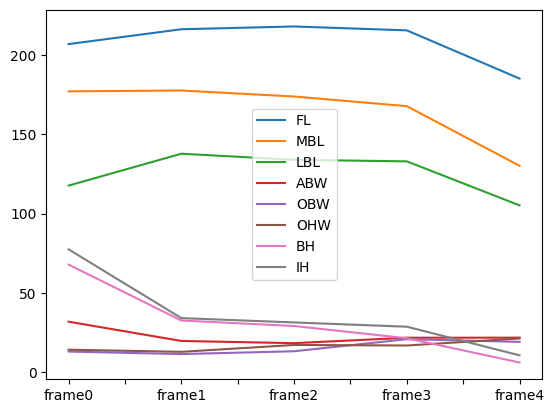

In [4]:
df['frame0':'frame4'].plot()